# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from textblob import TextBlob
from wordcloud import WordCloud
from string import digits
import requests
import pandas as pd
import nltk
import string
import seaborn as sns
import re
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))
import nltk
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
# pages = 50
# page_size = 100

# reviews = []

# # for i in range(1, pages + 1):
# for i in range(1, pages + 1):

#     print(f"Scraping page {i}")

#     # Create URL to collect links from paginated data
#     url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

#     # Collect HTML data from this page
#     response = requests.get(url)

#     # Parse content
#     content = response.content
#     parsed_content = BeautifulSoup(content, 'html.parser')
#     for para in parsed_content.find_all("div", {"class": "text_content"}):
#         reviews.append(para.get_text())

#     print(f"   ---> {len(reviews)} total reviews")

In [ ]:
# df = pd.DataFrame()
# df["reviews"] = reviews
# df.head()

In [ ]:
# df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
import pandas as pd

csv_path = "BA_reviews.csv"
df1 = pd.read_csv(csv_path)
df1.reset_index(drop=True, inplace=True)

print(df1['reviews'])

0       ✅ Trip Verified |  4 Hours before takeoff we r...
1       ✅ Trip Verified |  I recently had a delay on B...
2       Not Verified |  Boarded on time, but it took a...
3       ✅ Trip Verified |  5 days before the flight, w...
4       Not Verified |  \r\nWe traveled to Lisbon for ...
                              ...                        
3696    YYZ to LHR - July 2012 - I flew overnight in p...
3697    LHR to HAM. Purser addresses all club passenge...
3698    My son who had worked for British Airways urge...
3699    London City-New York JFK via Shannon on A318 b...
3700    SIN-LHR BA12 B747-436 First Class. Old aircraf...
Name: reviews, Length: 3701, dtype: object


In [ ]:
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3701 non-null   int64 
 1   reviews     3701 non-null   object
dtypes: int64(1), object(1)
memory usage: 58.0+ KB


,Unnamed: 0
count,3701.000000
mean,1850.000000
std,1068.531001
min,0.000000
25%,925.000000
50%,1850.000000
75%,2775.000000
max,3700.000000


In [ ]:
df1['reviews'] = df1['reviews'].str.strip()
df1['reviews']=df1['reviews'].str.lstrip('✅ Trip Verified |')
df1['reviews']=df1['reviews'].str.lstrip('Not Verified |')
df1['reviews']= df1['reviews'].str.lower()
print(df1)

      Unnamed: 0                                            reviews
0              0  4 hours before takeoff we received a mail stat...
1              1  i recently had a delay on british airways from...
2              2  boarded on time, but it took ages to get to th...
3              3  5 days before the flight, we were advised by b...
4              4  \r\nwe traveled to lisbon for our dream vacati...
...          ...                                                ...
3696        3696  yyz to lhr - july 2012 - i flew overnight in p...
3697        3697  lhr to ham. purser addresses all club passenge...
3698        3698  my son who had worked for british airways urge...
3699        3699  london city-new york jfk via shannon on a318 b...
3700        3700  sin-lhr ba12 b747-436 first class. old aircraf...

[3701 rows x 2 columns]


In [ ]:
#remove punctuation
df1['reviews'] = df1['reviews'].str.replace('[^\w\s]','')
print(df1['reviews'])

0       4 hours before takeoff we received a mail stat...
1       i recently had a delay on british airways from...
2       boarded on time but it took ages to get to the...
3       5 days before the flight we were advised by ba...
4       \r\nwe traveled to lisbon for our dream vacati...
                              ...                        
3696    yyz to lhr  july 2012  i flew overnight in pre...
3697    lhr to ham purser addresses all club passenger...
3698    my son who had worked for british airways urge...
3699    london citynew york jfk via shannon on a318 bu...
3700    sinlhr ba12 b747436 first class old aircraft 1...
Name: reviews, Length: 3701, dtype: object


<ipython-input-5-05b35ac04ac2>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['reviews'] = df1['reviews'].str.replace('[^\w\s]','')


In [ ]:
# tokenize
print(df1.iloc[1,1])
df1['reviews'] = df1.apply(lambda row: nltk.word_tokenize(row['reviews']), axis=1)
print(df1.iloc[0,1])

i recently had a delay on british airways from bru to lhr that was due to staff shortages they announced that there was a 2 hour holding delay but they would board us immediately in hopes of clearing the gate and leaving early we had to wait the full 2 hours inside the airplane the plane was old dirty had no power at the seats the staff provided a small bag of pretzels and 250ml of water to the passengers for 2 hour delay and 2 hour flight there were no options to purchase food or drink there were no entertainment options available i am a oneworld emerald elite member but they do not upgrade members based on status first class lounges at heathrow are overcrowded understaffed and poorly equipped the help desk is completely unhelpful when an error arises with delays and cancellations  even when having the top status the avios points system has been devalued to near worthlessness and requires fees to book reward that nearly equal the price of the revenue ticket british has lost its way in

In [ ]:
df1['reviews'] = df1['reviews'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
print(df1.head(20))

    Unnamed: 0                                            reviews
0            0  4 hours takeoff received mail stating cryptic ...
1            1  recently delay british airways bru lhr due sta...
2            2  boarded time took ages get runway due congesti...
3            3  5 days flight advised ba cancelled asked us re...
4            4  traveled lisbon dream vacation cruise portugal...
5            5  booked flight bucharest manchester 2h 45 layov...
6            6  booked online months ago hitch replacement air...
7            7  flight time crew polite story outward flight f...
8            8  angry disappointed unsatisfied route london at...
9            9  infrequent flyer british airways always first ...
10          10  totally unremarkable flight time comfortable e...
11          11  1 ground crew heathrow left 60 passengers lugg...
12          12  london heathrow gibraltar 24th october 2023 sh...
13          13  first time flying british airways would hesita...
14        

In [ ]:
def polarity_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None



def tag_cal(num):
    if num<0:
        return 'Negative'
    elif num>0:
        return 'Positive'
    else:
        return 'Neutral'


df1['polarity'] = df1['reviews'].apply(polarity_calc)


df1['tag'] = df1['polarity'].apply(tag_cal)


print(df1)

      Unnamed: 0                                            reviews  polarity  \
0              0  4 hours takeoff received mail stating cryptic ... -0.048214   
1              1  recently delay british airways bru lhr due sta...  0.006944   
2              2  boarded time took ages get runway due congesti...  0.140833   
3              3  5 days flight advised ba cancelled asked us re...  0.113889   
4              4  traveled lisbon dream vacation cruise portugal...  0.135417   
...          ...                                                ...       ...   
3696        3696  yyz lhr july 2012 flew overnight premium econo...  0.310000   
3697        3697  lhr ham purser addresses club passengers name ...  0.173214   
3698        3698  son worked british airways urged fly british a...  0.113542   
3699        3699  london citynew york jfk via shannon a318 reall...  0.340000   
3700        3700  sinlhr ba12 b747436 first class old aircraft 1... -0.003221   

           tag  
0     Nega

In [ ]:
df1

,Unnamed: 0,reviews,polarity,tag
0,0,4 hours takeoff received mail stating cryptic ...,-0.048214,Negative
1,1,recently delay british airways bru lhr due sta...,0.006944,Positive
2,2,boarded time took ages get runway due congesti...,0.140833,Positive
3,3,5 days flight advised ba cancelled asked us re...,0.113889,Positive
4,4,traveled lisbon dream vacation cruise portugal...,0.135417,Positive
...,...,...,...,...
3696,3696,yyz lhr july 2012 flew overnight premium econo...,0.310000,Positive
3697,3697,lhr ham purser addresses club passengers name ...,0.173214,Positive
3698,3698,son worked british airways urged fly british a...,0.113542,Positive
3699,3699,london citynew york jfk via shannon a318 reall...,0.340000,Positive


In [ ]:
(df1.groupby('tag').size()/df1['tag'].count())*100

tag
Negative    28.938125
Neutral      0.702513
Positive    70.359362
dtype: float64

In [ ]:
review_counts = df1['tag'].value_counts()
print(review_counts)


Positive    2604
Negative    1071
Neutral       26
Name: tag, dtype: int64


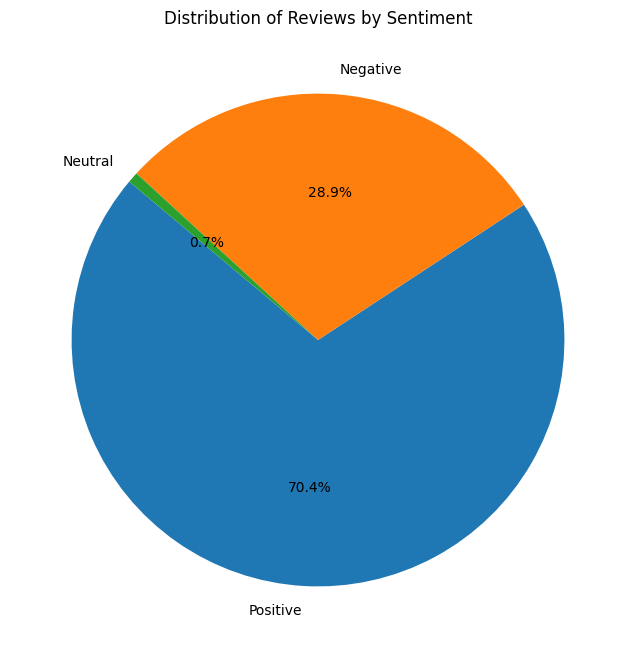

In [ ]:
import matplotlib.pyplot as plt

# Plotting the Pie chart
plt.figure(figsize=(8, 8))
plt.pie(review_counts, labels=review_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Reviews by Sentiment')
plt.show()


In [ ]:
!pip install wordcloud
!pip show Pillow
!pip install --upgrade Pillow


Defaulting to user installation because normal site-packages is not writeable
Name: Pillow
Version: 10.1.0
Summary: Python Imaging Library (Fork)
Home-page: https://python-pillow.org
Author: Jeffrey A. Clark (Alex)
Author-email: aclark@aclark.net
License: HPND
Location: c:\users\user\appdata\roaming\python\python38\site-packages
Requires: 
Required-by: wordcloud, scikit-image, matplotlib, imageio, bokeh
Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip uninstall wordcloud
!pip install wordcloud


^C
Defaulting to user installation because normal site-packages is not writeable


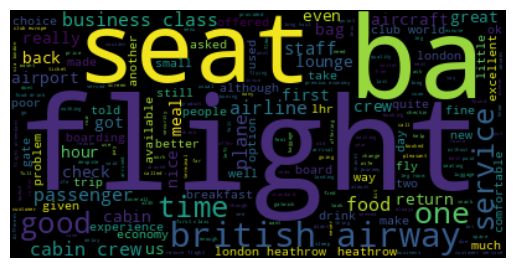

In [ ]:
text = " "
for ind in df1.index:
    if df1['tag'][ind] == "Positive":
        text = text + df1['reviews'][ind]

wordcloud_positive = WordCloud().generate(text)


# Display the generated image:
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()